In [1]:
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'Study Hours': [5, 10, 2, 8, 12, 4, 6, 7, 1, 9],
    'Attendance': [80, 90, 60, 85, 95, 70, 75, 88, 50, 92],
    'Pass': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
df.head()

,Study Hours,Attendance,Pass
0,5,80,1
1,10,90,1
2,2,60,0
3,8,85,1
4,12,95,1


Study Hours    0
Attendance     0
Pass           0
dtype: int64


C:\Users\Rutvik Suryawanshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rutvik Suryawanshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


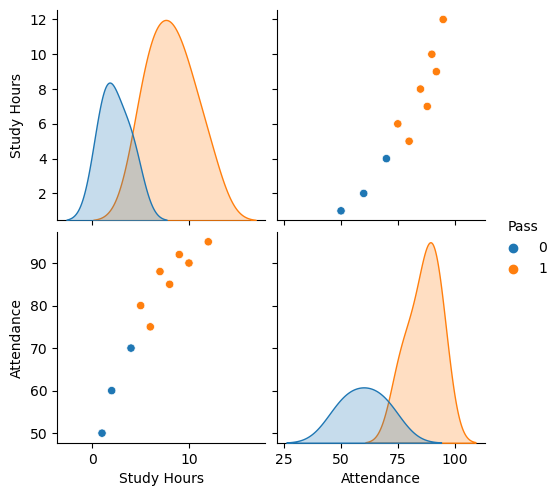

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Visualize relationships
sns.pairplot(df, hue="Pass")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and label
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 1.0


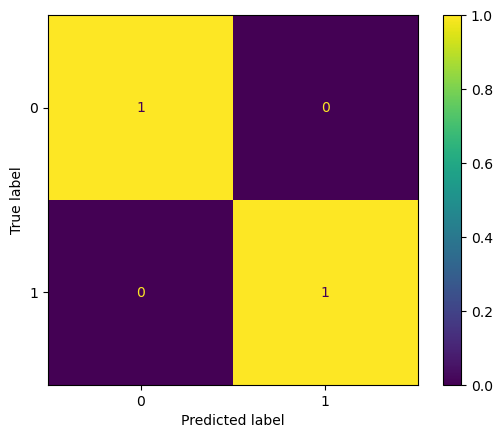

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [5]:
# Coefficients
coefficients = pd.DataFrame(model.coef_[0], index=['Study Hours', 'Attendance'], columns=['Importance'])
print(coefficients)

# Interpretation: Higher coefficients show stronger influence on prediction.

             Importance
Study Hours    0.251680
Attendance     0.675928
